In [1]:
# specify your student id and your name
id = 'W20071494'
name = 'Kacper Woloszyn'

In [1]:
# setup magic - see kmurphy.bitbucket.org/modules/Advanced_Calculus for setup instructions.
%matplotlib inline
from calculus import *
setup_practical(id, name)

NameError: name 'name' is not defined

# Practical 08 - Differentiation

## Introduction

### Aim

In this practical we will use python to 

 * estimate the derivative of a function using finite differences (based on differention from first principles formula).
 * calculate the derivtaive of function symbolically (based on the differentiaion rules).
 
### Mathematics Concepts

 * The __derivative__ of a function $f(t)$ is defined as 

\\[
    f'(t) = \lim_{h\to 0} \frac{f(t+h)-f(t)}{h}
\\]

 * As you have learned in Computer Architecture, a computer is a digital device and therefore cannot represent arbitrary small numbers (see [Some disasters caused by numerical errors](http://ta.twi.tudelft.nl/users/vuik/wi211/disasters.html)), so taking the limit as $h\to 0$ is problematic. Instead of taking the limit we just set $h$ to a small value and we get the __finite difference approximation to the derivative__ defined by 

\\[
    f'(t) \approx f'_h(t) = \frac{f(t+h)-f(t)}{h}
\\]

where __step size__, $h$, is some small value. 
 
### Python Concepts

 * The Python symbolic module, __sympy__, has functions 
    * __symbols__ or __Symbol__ define a symbol 
    * __Funciton__ to define a symbolic funciton
    * __limit(f, t, t0)__ - compute the limit of the experssion, __f__, as the variable __t__ tends towards __t0__.
    * __diff(f, t)__ - differentiation the function, __f__, with respect to variable __t__.
    * __display__ to dispaly an experssion using mathematics notation.
    * __log(v,b)__ to calculate the log of __v__ to base __b__.
   and from __sympy.solvers__
    * __solve__ to solve an algebraic equation.
    
   and methods 
    * __subs(exp_old,exp_new)__ to substitute sub-expresion __exp_old__ with __exp_new__.  
    * __diff(var)__ to differentiate an expression with respect to variable __var__.

## Standard Importing of  Libraries


In [2]:
# for numeric work
import numpy as np
import matplotlib.pyplot as plt

# for symbolic work
import sympy as sym
from sympy.plotting import plot

## Finite Difference Approximation to the Derivative


#### Example 1 - Finite difference of a quadratic

The function $f(t)=t^2-5t+6$ (a quadratic) has derivative $f'(t)=2t-5$ (a line).



In [3]:
# define function, its finite difference approximation, and its exact derivative
def f(t):
    return t**2 - 5*t + 6

def df(t,h):
    return (f(t+h) - f(t))/h

def df_exact(t,h):
    return 2*t-5

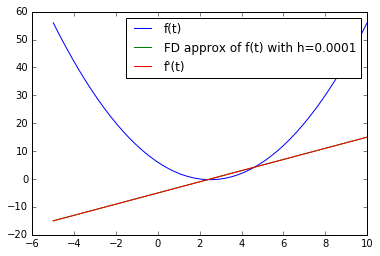

In [4]:
# plot funciton (blue), the finite difference approximation to the derivative (green), and its exact derivative (red)
h = 1E-4   # a small number
tValues = np.linspace(-5,10)
plt.plot(tValues,f(tValues), label="f(t)")
plt.plot(tValues,df(tValues,h), label="FD approx of f(t) with h=%s" %h)
plt.plot(tValues,df_exact(tValues,h), label="f'(t)")
plt.legend()
plt.show();

#### Qeuestion 1

Approximalty how large can $h$ be before the error in the finite difference approximation to the derivative is large enough to be seen in the above graph? 

In [7]:
# Answer 1
60

60

#### Question 2

Approximalty how small can $h$ be before the error in the finite difference approximation to the derivative is large enough to be seen in the above graph? 

In [8]:
# Answer 2
0.2

0.2

#### Example 2 - Finite difference of a trigonometric function

The function $f(t)=\cos(3t)$ has derivative $f'(t)=-3\sin(3t)$.


In [5]:
# define function, its finite difference approximation, and its exact derivative
def f(t):
    return np.cos(3*t)

def df(t,h):
    return (f(t+h) - f(t))/h

def df_exact(t,h):
    return -3*np.sin(3*t)

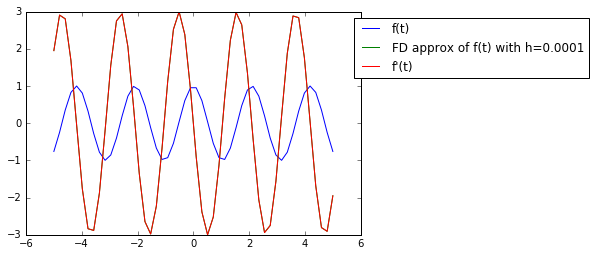

In [6]:
# plot funciton (blue), the finite difference approximation to the derivative (green), and its exact derivative (red)
h = 1E-4  # a small number
tValues = np.linspace(-5,5)
plt.plot(tValues,f(tValues), label="f(t)")
plt.plot(tValues,df(tValues,h), label="FD approx of f(t) with h=%s" %h)
plt.plot(tValues,df_exact(tValues,h), label="f'(t)")
plt.legend(bbox_to_anchor=(1.7, 1.0))
plt.show();

#### Qauestion 3

Approximalty how large can $h$ be before the error in the finite difference approximation to the derivative is large enough to be seen in the above graph? 

In [10]:
# Answer 3
1.2

1.2

#### Question 4

Approximalty how small can $h$ be before the error in the finite difference approximation to the derivative is large enough to be seen in the above graph? 

In [11]:
# Answer 4
-1.2

-1.2

> The leason I'm hoping you get here is that finite differencing is easy to do but one must be careful in picking a suitable value for $h$.  In the above examples the goldilocks range (not too big, not too small) is relatively wide but the functions we are using are trival. What happens if we try to apply finite diferencing to arbitrary complicated functions? Does the goldilocks range get narrow? disappear altogether ?   

## Calculating the Derivative using Symbolic Differentiation (sympy)

**NOTE:** We will import sympy using 

    from sympy import *
    
to save us on typing __sym.__ all the time - it gets boring fast.

In [12]:
from sympy import *


In [13]:
# define symbols and function
t = symbols('t')
f = t**2 -5*t + 6
f

t**2 - 5*t + 6

In [14]:
# calculate derivative (symbolically)
df = diff(f,t)
df 

2*t - 5

So we have our derivative. However, it would be nicer if the output used matematical notation (superscripts for power, etc) rather than the one-dimentional programming notation. We turn on rendering with mathematical notation with

    from IPython.display import display
    sym.init_printing(pretty_print=True)

and to turn off use

    sym.init_printing(pretty_print=False)

In [15]:
from IPython.display import display
sym.init_printing(pretty_print=True)

In [16]:
# now f is 
f

In [17]:
# and its derivative is 
df

#### Example 3 - derivative of some random functions

In [18]:
f = 3*t**4
f

In [19]:
diff(f,t)

In [20]:
f = sin(t)+cos(2*t)
f

In [21]:
diff(f,t)

In [22]:
a, c, n = symbols('a c n')
f = a*t**n  + c
f

In [23]:
diff(f,t)

In [24]:
# we can simplify this a bit ...  (we refer the previous output using _)
simplify(_)

In [25]:
f = expand((1+t)**10)
display(f)
diff(f,t)

In [26]:
f = (1+t)**10
display(f)
diff(f,t)

### Example 4: Verifying differentiation rules

In [27]:
x = Symbol('x')      # define symbol for independent variable
u = Function('u')    # define the two functions u and v
v = Function('v')

In [28]:
# product rule
y = u(x)*v(x)
diff(y)

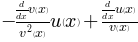

In [29]:
# quotient rule
y = u(x)/v(x)
diff(y)

### Example 5: Plotting a funtion and its symbolic derivative 

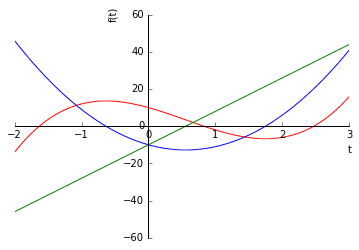

In [30]:
f = 3*t**3 - 5*t**2 - 10*t + 10             # (position)
df = diff(f,t)        # first derivative      (velocity)
ddf = diff(df,t)      # second derivative     (acceleration)
dddf = diff(f,t,3)    # third derivative      (jerk)

p = plot(f,df,ddf,(t,-2,3), show=False)
p[0].line_color = 'red'
p[1].line_color = 'blue'
p[2].line_color = 'green'

p.show()

## Questions

#### Question 4

A stone is tossed vertically upward with an initial velocity of 25 m/sec from the top of a 30m building. 

**(a)** Construct a formula for the position of the stone, $t$ seconds after it is thrown.

**(b)** What is the height of the stone after .25 seconds?

**(c)** Find the velocity of the stone after 1 second.

**(d)** When does the stone hit the ground? (HARD, use __solve__ from __sympy.solvers__)

In [34]:
# (a) Construct a formula for the position of the stone, t seconds after it is thrown.
t = symbols('t')
f = t**2 +25*t + 30
f

In [38]:
# (b) What is the height of the stone after .25 seconds?
(0.25)**2 +25*0.25 + 30

In [40]:
# (c) Find the velocity of the stone after 1 second.
df = diff(f,t)
df 

In [44]:
2*(1.0)+25

In [58]:
# (d) When does the stone hit the ground? (HARD - need to use solve)
from sympy.solvers import solve


#### Question 5

You have learnt/observed that `the $(n+1)$th derivative of a polynomial of degree $n$ is zero'. Lets write code to verify this for $n\le30$.

Write code that demonstrate that 
the 1st derivative of a constant, the 2nd derivative of a line,
the 3rd derivative of a quadratic, 
the 4th derivative of a cubic, etc. up to the $(n+1)$th derivative of a polynomial of degree $n$ where $n=30$ is zero. 

In [ ]:
# Answer 5


#### Question 6

A Cessna plane takes off from an airport at sea level and its altitude (in feet) at time t (in minutes) is given by

\\[
    h = 2000 \ln (t + 1)
\\]

Find the rate of climb at time t = 3 min.

In [59]:
# Answer 6
h = 2000*Sym.ln(x)*(t+1)
print ("h")

NameError: name 'Sym' is not defined

In [60]:
h= 2000*np.log*(3+1)

TypeError: unsupported operand type(s) for *: 'int' and 'numpy.ufunc'

#### Question 7 - Sound Pressure and Decibels

The sound pressure P for a given sound is measured in decibels (dB) and given by

\\[
    P = 10 \log \frac {W}{W_0}\quad \text{dB}
\\]

where 

 * $W$ is the size of a variable energy source (called the __sound power__), measured in Watts (W).
 * $W_0$ is the lowest threshold of sound that humans can typically hear. It is a constant defined by

\\[
    W_0 = 10^{-12}\quad\text{W}/\text{m}^2
\\]

The sound pressure is related to the sound __intensity__ of a sound wave. __Logarithms__ are used to cope with the large variation in sound pressure that humans can hear (from the whispering wind at around 20 dB up to the roar of a rock concert at 120 dB, depending on the distance from the speakers).

**(a)** Write python code to find the rate of change of the sound pressure $P$ with repect to time if $W=7.2$ and $\frac{dW}{dt}=0.05$ at some given time $t$.

**(b)** If the variable sound power $W$ is given by
\\[
W = t^2 + t + 1,
\\]

find the rate of change of the sound pressure $P$, at time $t=3$ s.

In [62]:
# Answer 7(a) - first we define symbols and functions
W0 = Symbol('W_0')
W = Function("w")
t = Symbol("t")

In [ ]:
# define P


In [ ]:
# differentiate P with respect to t


In [ ]:
# The required rate of change is given by
# substituting the given value of the derivative of W in place of dW/dt, and the given value of W 


In [ ]:
# Answer 7(b) - define symbols and functions
W = t**2+t+1


In [ ]:
# differentiate P 


In [ ]:
# substitute t=3 to obtain the rate of change of sound pressure at the required time.


#### Question 8 - charge of a capacitor

The charge of a capacitor, $q$, in a circuit containing a capacitor of capacitance $C$, a resistance $R$, and a source of voltage $E$ is given by

\\[
    q = C E \left(1−e^{-t/(RC)}\right)
\\]

Show, using differentiation, that $q$ satisfies the equation

\\[
    R \frac{dq}{dt} + \frac{q}{C} = E
\\]


In [ ]:
# Answer 8 - define symbols and functions


In [2]:
# differentiate q and check required equation